In [1]:
import pandas as pd
import numpy as np

In [2]:
general_load_profile = (pd.read_csv("../data/Load Profile - Sheet5.csv")
                        .T
                        .drop("Unnamed: 0")
                        .rename(columns={
                            0 : "Weekend Rain",
                            1 : "Weekend Dry",
                            2 : "Weekday School Rain",
                            3 : "Weekday School Dry",
                            4 : "Weekday Break Rain",
                            5 : "Weekday Break Dry"}
                           )
                       ).astype("float")

In [3]:
general_load_profile

,Weekend Rain,Weekend Dry,Weekday School Rain,Weekday School Dry,Weekday Break Rain,Weekday Break Dry
1:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
2:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
3:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
4:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
5:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
6:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
7:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
8:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
9:00:00 AM,5250.0,6205.0,5716.0,5716.0,4772.0,5727.0
10:00:00 AM,5250.0,6205.0,5716.0,5716.0,4772.0,5727.0


In [15]:
load_profile = pd.DataFrame(range(8760), index=pd.date_range(start="1/1/2006", end="1/1/2007", freq="H").delete(-1))

In [49]:
load_profile.loc[
    (load_profile.index.month_name() == "January") & (load_profile.index.day_name() == "Sunday"), 0
] = np.tile(general_load_profile["Weekend Dry"].values, 5)

load_profile.loc[
    (load_profile.index.month_name() == "January") & (load_profile.index.day_name() == "Saturday"), 0
] = np.tile(general_load_profile["Weekend Dry"].values, 4)

load_profile.loc[
    (load_profile.index.month_name() == "January") & (load_profile.index.day_name() == "Monday"), 0
] = np.tile(general_load_profile["Weekday School Dry"].values, 5)

load_profile.loc[
    (load_profile.index.month_name() == "January") & (load_profile.index.day_name() == "Tuesday"), 0
] = np.tile(general_load_profile["Weekday School Dry"].values, 5)

load_profile.loc[
    (load_profile.index.month_name() == "January") & (load_profile.index.day_name() == "Wednesday"), 0
] = np.tile(general_load_profile["Weekday School Dry"].values, 4)

load_profile.loc[
    (load_profile.index.month_name() == "January") & (load_profile.index.day_name() == "Thursday"), 0
] = np.tile(general_load_profile["Weekday School Dry"].values, 4)

load_profile.loc[
    (load_profile.index.month_name() == "January") & (load_profile.index.day_name() == "Friday"), 0
] = np.tile(general_load_profile["Weekday School Dry"].values, 4)



In [50]:
load_profile

,0
2006-01-01 00:00:00,726.0
2006-01-01 01:00:00,726.0
2006-01-01 02:00:00,726.0
2006-01-01 03:00:00,726.0
2006-01-01 04:00:00,726.0
...,...
2006-12-31 19:00:00,8755.0
2006-12-31 20:00:00,8756.0
2006-12-31 21:00:00,8757.0
2006-12-31 22:00:00,8758.0


<AxesSubplot:>

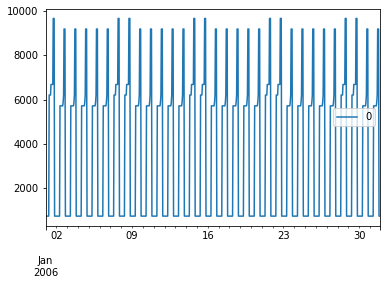

In [51]:
load_profile[load_profile.index.month_name() == "January"].plot()

In [67]:
d = pd.date_range(start="1/1/2006", end="1/1/2007", freq="D")

In [76]:
d[d.month_name() == "January"].day_name().value_counts()

Monday       6
Tuesday      5
Sunday       5
Wednesday    4
Thursday     4
Friday       4
Saturday     4
dtype: int64